This document provides a comprehensive explanation of the Python code, which implements the Non-dominated Sorting Genetic Algorithm II (NSGA-II). This specific application of NSGA-II is designed to simultaneously minimize three well-known mathematical test functions: Booth, Matyas, and Rastrigin.

1. Objective Functions
The code defines three objective functions, all of which are minimization problems:

booth_function(x, y): A unimodal (single global minimum) function with its minimum at (1,3). It's a relatively simple function to optimize.

matyas_function(x, y): Another unimodal function with its global minimum at (0,0). As observed in previous runs, this function is particularly "easy" for the algorithm to minimize within the specified domain, often reaching near-optimal values very early in the optimization process.

rastrigin_function(x, y): A highly multimodal function with many local minima, but a single global minimum at (0,0). This function is significantly more challenging to optimize than Booth or Matyas due to its rugged landscape, making it a good test for an optimizer's ability to avoid local traps and explore the search space effectively.

All functions operate on a 2D input [x, y].

2. NSGA-II Parameters
The algorithm's behavior is controlled by several key parameters:

POP_SIZE: The number of individuals (chromosomes) in the population for each generation. A larger population increases diversity but also computational cost. It's set to 1500 to handle the complexity of three objectives.

MAX_GEN: The maximum number of generations (iterations) the algorithm will run. Set to 100 for sufficient convergence.

XMIN, XMAX, YMIN, YMAX: Define the search domain for the x and y variables of the chromosomes, ranging from -10 to 10 for both.

ALPHA_BLX: A parameter for the BLX-alpha crossover operator, controlling the extent of the search space covered by offspring.

CROSS_RATE: The probability that two parent chromosomes will undergo crossover to produce offspring.

MUT_RATE: The probability that a gene (an x or y coordinate) in a chromosome will be mutated.

ETA_MUT: A distribution index for polynomial mutation, affecting the strength of the mutation. A higher value leads to smaller perturbations.

NUM_OBJECTIVES: Explicitly set to 3, indicating the number of objective functions being optimized.

3. Chromosome Generation & Evaluation
random_chromosome(): This function generates a new individual (chromosome) as a list [x, y], where both x and y are random floating-point numbers uniformly distributed within their respective XMIN/XMAX and YMIN/YMAX bounds.

evaluate(chrom): Takes a chromosome [x, y] and returns a tuple of the three objective values: (booth_function(x, y), matyas_function(x, y), rastrigin_function(x, y)).

eval_cache and evaluate_cached(chrom): An optional but highly recommended caching mechanism. It stores the results of already evaluated chromosomes to avoid redundant computations, especially useful when objective function evaluations are computationally expensive.

4. NSGA-II Utility Functions
These functions form the core logic of NSGA-II for multi-objective handling:

dominates(objA, objB): This crucial function determines if one objective vector (objA) dominates another (objB). For minimization problems (which all your functions are), objA dominates objB if objA is less than or equal to objB for all objectives, and strictly less than objB for at least one objective.

fast_non_dominated_sort(pop_objs): This is the namesake of NSGA-II. It takes all individuals' objective values and sorts them into "fronts." The first front (Front 0) contains all non-dominated solutions. Subsequent fronts contain solutions that are non-dominated within the remaining population after the higher-ranked fronts have been removed. This process is efficient (O(MN^2) where M is objectives, N is population size).

crowding_distance(obj_vals, front_indices): Calculates the "crowding distance" for each individual within a given front. Solutions with larger crowding distances are in less "crowded" regions of the objective space and are thus preferred to maintain diversity along the Pareto front. Boundary solutions in each objective dimension are assigned an infinite crowding distance to ensure their preservation.

5. Real-Coded Genetic Algorithm Operators
These functions implement the evolutionary operations:

clamp_value(val, index): A helper function to ensure that mutated or crossover-generated values for x and y coordinates remain within their defined XMIN/XMAX and YMIN/YMAX boundaries.

blend_crossover(pA, pB, ...) (BLX-alpha): Takes two parent chromosomes (pA, pB) and produces two offspring (c1, c2). BLX-alpha generates offspring values within a range that extends slightly beyond the parents' values, promoting exploration.

polynomial_mutation(chrom, ...): Randomly selects genes in a chromosome and applies a polynomial perturbation. This operator is good for fine-tuning solutions and preventing premature convergence by introducing small, controlled changes.

make_offspring(parentA, parentB): Orchestrates the genetic operations by first applying blend_crossover to parents and then polynomial_mutation to the resulting offspring.

6. Main NSGA-II Algorithm (nsga2())
This function orchestrates the entire optimization process:

Initialization: Creates an initial random population.

Main Loop (MAX_GEN iterations):

Evaluation: Evaluates all individuals in the current population.

Offspring Generation: Creates a new set of offspring using blend_crossover and polynomial_mutation from randomly selected parents.

Combination: Merges the current population with the offspring to form a combined population.

Non-dominated Sorting: Applies fast_non_dominated_sort to the combined_obj to rank all solutions into fronts.

Environmental Selection: Constructs the new_population for the next generation. It greedily adds entire fronts, starting from the best (Front 0). If adding a front would exceed POP_SIZE, it uses crowding_distance to select the most diverse individuals from that overflowing front until POP_SIZE is met.

Logging: Tracks the minimum value found for each objective (Booth, Matyas, Rastrigin) in the current non-dominated front (Front 0) and prints it to the console.

Return: After all generations, it identifies and returns the final Pareto solutions (chromosomes) and their corresponding objective values from the first non-dominated front, along with the historical minimum objective values for plotting convergence.

GEN 1/80: Min Booth=0.0849, Min Matyas=0.0007
GEN 2/80: Min Booth=0.0849, Min Matyas=0.0007
GEN 3/80: Min Booth=0.0849, Min Matyas=0.0007
GEN 4/80: Min Booth=0.0627, Min Matyas=0.0005
GEN 5/80: Min Booth=0.0093, Min Matyas=0.0005
GEN 6/80: Min Booth=0.0093, Min Matyas=0.0005
GEN 7/80: Min Booth=0.0080, Min Matyas=0.0002
GEN 8/80: Min Booth=0.0080, Min Matyas=0.0002
GEN 9/80: Min Booth=0.0016, Min Matyas=0.0002
GEN 10/80: Min Booth=0.0016, Min Matyas=0.0002
GEN 11/80: Min Booth=0.0016, Min Matyas=0.0001
GEN 12/80: Min Booth=0.0016, Min Matyas=0.0001
GEN 13/80: Min Booth=0.0016, Min Matyas=0.0001
GEN 14/80: Min Booth=0.0010, Min Matyas=0.0001
GEN 15/80: Min Booth=0.0010, Min Matyas=0.0001
GEN 16/80: Min Booth=0.0010, Min Matyas=0.0000
GEN 17/80: Min Booth=0.0010, Min Matyas=0.0000
GEN 18/80: Min Booth=0.0010, Min Matyas=0.0000
GEN 19/80: Min Booth=0.0010, Min Matyas=0.0000
GEN 20/80: Min Booth=0.0010, Min Matyas=0.0000
GEN 21/80: Min Booth=0.0010, Min Matyas=0.0000
GEN 22/80: Min Booth=0

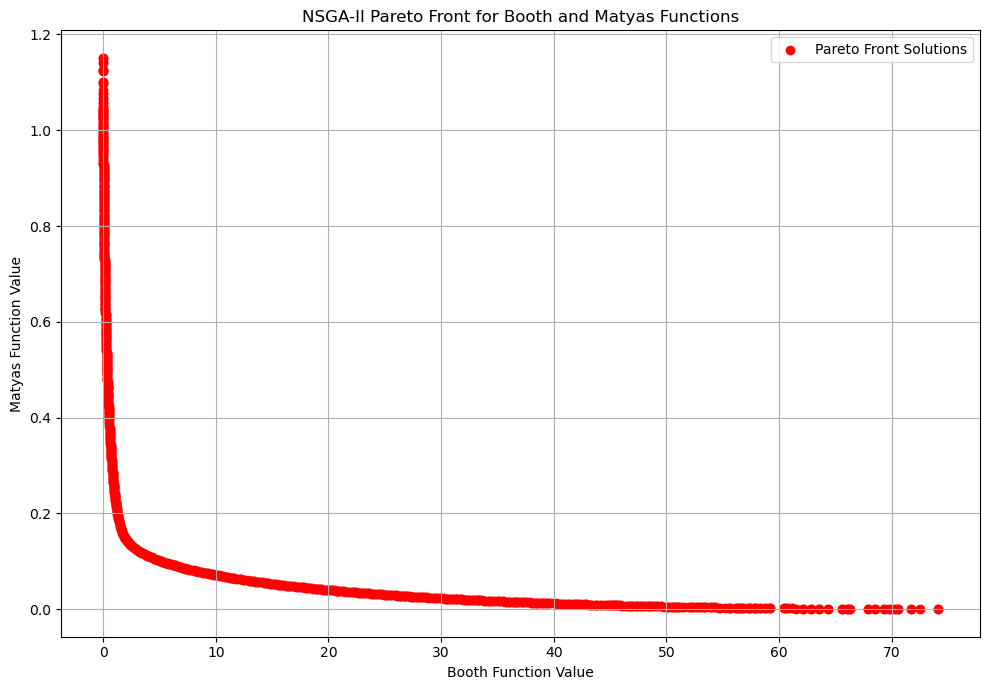

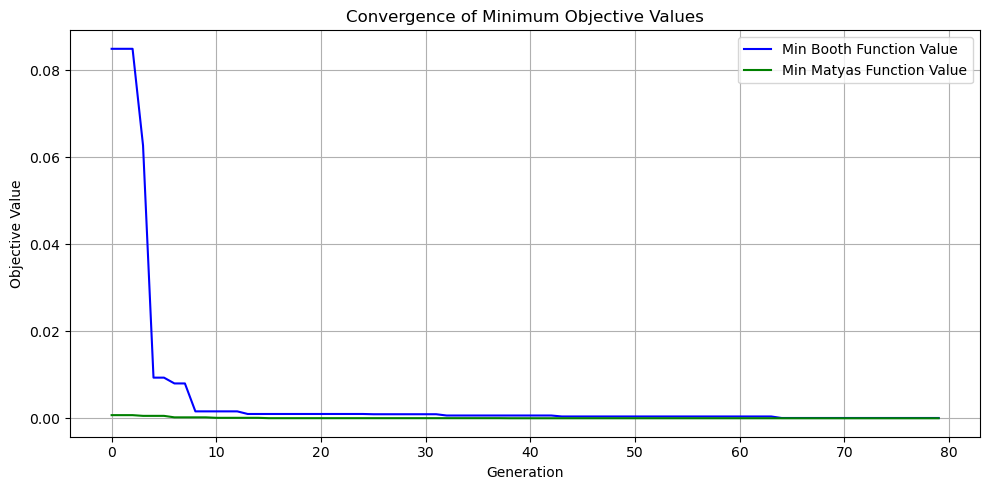


--- Example Pareto Solutions ---
Solution 1: Chromosome=[-0.002653852033858206, -0.0008279523251813817], Objectives=(74.12174937779012, 9.54707052482799e-07)
Solution 2: Chromosome=[1.0032413011938608, 2.99453567621725], Objectives=(6.013218555489081e-05, 1.1511355296111307)
Solution 3: Chromosome=[-0.002653852033858206, -0.0008279523251813817], Objectives=(74.12174937779012, 9.54707052482799e-07)
Solution 4: Chromosome=[1.0032413011938608, 2.99453567621725], Objectives=(6.013218555489081e-05, 1.1511355296111307)
Solution 5: Chromosome=[0.02003406662821197, 0.02171540076099221], Objectives=(72.50150150028809, 1.813690138933522e-05)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math # Import math for general use, though not strictly needed for these simple functions

###############################################################################
# 1) OBJECTIVE FUNCTIONS
###############################################################################
def booth_function(x, y):
    """Booth's function: f1 = (x + 2y - 7)^2 + (2x + y - 5)^2"""
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

def matyas_function(x, y):
    """Matyas function: f2 = 0.26*(x^2 + y^2) - 0.48*x*y"""
    return 0.26*(x**2 + y**2) - 0.48*x*y

###############################################################################
# 2) NSGA-II PARAMETERS
###############################################################################
POP_SIZE = 1000
MAX_GEN = 80
XMIN, XMAX = -10, 10 # Domain for x
YMIN, YMAX = -10, 10 # Domain for y

ALPHA_BLX = 0.5
CROSS_RATE = 0.9
MUT_RATE = 0.2
ETA_MUT = 20.0

# Number of objectives for evaluation (Booth and Matyas)
NUM_OBJECTIVES = 2

###############################################################################
# 3) CHROMOSOME GENERATION & EVALUATION
###############################################################################
def random_chromosome():
    """Generates a random chromosome [x, y] within the defined bounds."""
    return [random.uniform(XMIN, XMAX), random.uniform(YMIN, YMAX)]

def evaluate(chrom):
    """
    Evaluates a chromosome [x, y] using the Booth and Matyas functions.
    Returns a tuple of objective values: (f1, f2).
    """
    x, y = chrom
    return booth_function(x, y), matyas_function(x, y)

# Cache for evaluation results (optional, but good for performance if evaluations are expensive)
eval_cache = {}

def evaluate_cached(chrom):
    """
    Evaluates a chromosome and caches the result.
    Uses rounding for the key to handle floating-point precision.
    """
    key = tuple(round(v, 6) for v in chrom)
    if key not in eval_cache:
        eval_cache[key] = evaluate(chrom)
    return eval_cache[key]

###############################################################################
# 4) NSGA-II UTILITY FUNCTIONS (Identical to your provided code)
###############################################################################
def dominates(objA, objB):
    """
    Checks if objective vector A dominates objective vector B.
    A dominates B if A is better or equal in all objectives and strictly better in at least one.
    Assuming minimization objectives.
    """
    better_or_equal = True
    strictly_better = False
    for a, b in zip(objA, objB):
        if a > b: # A is worse than B in this objective
            better_or_equal = False
            break
    if not better_or_equal:
        return False
    for a, b in zip(objA, objB):
        if a < b: # A is strictly better than B in this objective
            strictly_better = True
            break
    return strictly_better

def fast_non_dominated_sort(pop_objs):
    """
    Performs fast non-dominated sorting on a population's objective values.
    Returns a list of fronts, where each front contains indices of individuals.
    """
    pop_size = len(pop_objs)
    S = [[] for _ in range(pop_size)] # S[p] contains solutions dominated by p
    n = [0] * pop_size                # n[p] is the number of solutions that dominate p
    rank = [0] * pop_size             # rank[p] is the non-domination rank of p

    # Determine domination status for each individual
    for p in range(pop_size):
        for q in range(pop_size):
            if p == q:
                continue
            if dominates(pop_objs[p], pop_objs[q]):
                S[p].append(q)
            elif dominates(pop_objs[q], pop_objs[p]):
                n[p] += 1

    # Identify the first front (F1)
    front = [[]]
    for i in range(pop_size):
        if n[i] == 0:
            rank[i] = 0 # Rank 0 for non-dominated solutions
            front[0].append(i)

    # Iteratively find subsequent fronts
    k = 0
    while front[k]:
        Q = [] # Next front
        for p_idx in front[k]:
            for q_idx in S[p_idx]:
                n[q_idx] -= 1 # Decrement domination count for solutions dominated by p_idx
                if n[q_idx] == 0:
                    rank[q_idx] = k + 1
                    Q.append(q_idx)
        k += 1
        front.append(Q)
    return front[:-1] # Exclude the last empty front

def crowding_distance(obj_vals, front_indices):
    """
    Calculates the crowding distance for individuals in a given front.
    Assigns infinity to boundary points.
    """
    distances = {idx: 0.0 for idx in front_indices}
    if len(front_indices) <= 2:
        # If a front has 0, 1, or 2 individuals, assign infinite distance for boundary points
        for idx in front_indices:
            distances[idx] = float('inf')
        return distances

    num_obj = len(obj_vals[0])

    for m in range(num_obj): # Iterate through each objective
        # Sort the front by the current objective's value
        sorted_indices = sorted(front_indices, key=lambda idx: obj_vals[idx][m])

        # Assign infinite distance to the boundary points of the sorted front
        distances[sorted_indices[0]] = float('inf')
        distances[sorted_indices[-1]] = float('inf')

        min_val = obj_vals[sorted_indices[0]][m]
        max_val = obj_vals[sorted_indices[-1]][m]

        # Handle cases where min and max values are identical (no range for that objective)
        if abs(max_val - min_val) < 1e-9:
            continue # Skip calculation for this objective if all values are the same

        # Calculate distance for intermediate points
        for i in range(1, len(sorted_indices) - 1):
            idx = sorted_indices[i]
            distances[idx] += (obj_vals[sorted_indices[i+1]][m] - obj_vals[sorted_indices[i-1]][m]) / (max_val - min_val)
    return distances

###############################################################################
# 5) REAL-CODED GA OPERATORS: BLX-α CROSSOVER & POLYNOMIAL MUTATION
###############################################################################
def clamp_value(val, index):
    """Clamps a value to be within the X or Y domain."""
    if index == 0: # X coordinate
        return min(max(val, XMIN), XMAX)
    elif index == 1: # Y coordinate
        return min(max(val, YMIN), YMAX)
    else:
        # This case should not be reached for [x, y] chromosomes
        raise ValueError("Invalid index for clamping in 2D chromosome")

def blend_crossover(pA, pB, alpha=ALPHA_BLX, rate=CROSS_RATE):
    """
    Performs BLX-alpha crossover between two parent chromosomes.
    Aims to create offspring within an extended range around parents' values.
    """
    if random.random() > rate: # Crossover occurs based on CROSS_RATE
        return pA[:], pB[:] # Return copies of parents if no crossover

    c1, c2 = pA[:], pB[:] # Initialize offspring as copies of parents

    # Iterate through each gene (x and y coordinates)
    for i in range(len(pA)):
        x1, x2 = pA[i], pB[i]
        cmin = min(x1, x2)
        cmax = max(x1, x2)
        diff = cmax - cmin

        # Calculate lower and upper bounds for the offspring's gene value
        low = cmin - alpha * diff
        high = cmax + alpha * diff

        # Generate two random values within the [low, high] range
        val1 = random.uniform(low, high)
        val2 = random.uniform(low, high)

        # Clamp values to ensure they stay within the defined domain (XMIN/XMAX or YMIN/YMAX)
        c1[i] = clamp_value(val1, i)
        c2[i] = clamp_value(val2, i)
    return c1, c2

def polynomial_mutation(chrom, rate=MUT_RATE, eta=ETA_MUT):
    """
    Performs polynomial mutation on a chromosome.
    Introduces small perturbations to gene values, favoring small changes.
    """
    for i in range(len(chrom)): # Iterate through each gene (x and y coordinates)
        if random.random() < rate: # Mutation occurs based on MUT_RATE
            x = chrom[i]
            lower = XMIN if i == 0 else YMIN
            upper = XMAX if i == 0 else YMAX

            # Avoid division by zero if the domain range is extremely small
            if abs(upper - lower) < 1e-14:
                continue

            # Calculate relative positions within the domain
            delta1 = (x - lower) / (upper - lower)
            delta2 = (upper - x) / (upper - lower)

            rand = random.random()
            mut_pow = 1.0 / (eta + 1.0)

            if rand < 0.5:
                xy = 1.0 - delta1
                val = 2.0 * rand + (1.0 - 2.0 * rand) * (xy ** (eta + 1.0))
                deltaq = (val ** mut_pow) - 1.0
            else:
                xy = 1.0 - delta2
                val = 2.0 * (1.0 - rand) + 2.0 * (rand - 0.5) * (xy ** (eta + 1.0))
                deltaq = 1.0 - (val ** mut_pow)

            # Apply the mutation
            x = x + deltaq * (upper - lower)
            chrom[i] = clamp_value(x, i) # Ensure mutated value stays within bounds
    return chrom

def make_offspring(parentA, parentB):
    """Combines crossover and mutation to create two offspring from two parents."""
    c1, c2 = blend_crossover(parentA, parentB, alpha=ALPHA_BLX, rate=CROSS_RATE)
    c1 = polynomial_mutation(c1, rate=MUT_RATE, eta=ETA_MUT)
    c2 = polynomial_mutation(c2, rate=MUT_RATE, eta=ETA_MUT)
    return c1, c2

###############################################################################
# 6) MAIN NSGA-II ALGORITHM
###############################################################################
def nsga2():
    """Main NSGA-II loop."""
    # Initialize population with random chromosomes
    population = [random_chromosome() for _ in range(POP_SIZE)]

    # Lists to store the best objective values (for plotting convergence)
    # Note: For multi-objective, "best" is tricky. Here we'll just track first objective's min.
    # For a real multi-objective problem, you'd track the entire Pareto front.
    best_f1_history = []
    best_f2_history = []


    for gen in range(MAX_GEN):
        # Evaluate current population
        obj_vals_pop = [evaluate_cached(chrom) for chrom in population]

        # Generate offspring
        offspring = []
        indices = list(range(POP_SIZE))
        random.shuffle(indices) # Shuffle indices for random pairing
        for i in range(0, POP_SIZE, 2): # Pair parents for crossover
            pA = population[indices[i]]
            # Handle odd population size for the last parent
            pB = population[indices[i+1]] if i + 1 < POP_SIZE else population[indices[0]]
            c1, c2 = make_offspring(pA, pB)
            offspring.append(c1)
            offspring.append(c2)

        # Combine parent and offspring populations
        combined = population + offspring
        combined_obj = [evaluate_cached(ch) for ch in combined]

        # Perform non-dominated sorting
        fronts = fast_non_dominated_sort(combined_obj)

        new_population = []
        current_pop_size = 0

        # Fill the new population based on fronts and crowding distance
        for front in fronts:
            if current_pop_size + len(front) <= POP_SIZE:
                # If the entire front fits, add it
                new_population.extend([combined[idx] for idx in front])
                current_pop_size += len(front)
            else:
                # If the front doesn't entirely fit, use crowding distance to select
                dist = crowding_distance(combined_obj, front)
                # Sort individuals in the front by crowding distance in descending order
                sorted_front = sorted(front, key=lambda idx: dist[idx], reverse=True)
                # Add individuals until the population size is reached
                remaining_slots = POP_SIZE - current_pop_size
                new_population.extend([combined[idx] for idx in sorted_front[:remaining_slots]])
                current_pop_size += remaining_slots
                break # Population is full

        population = new_population # Update population for next generation

        # --- Logging best values from the first (non-dominated) front ---
        if fronts and fronts[0]:
            # Get objective values for the first front individuals
            front_0_objs = [combined_obj[idx] for idx in fronts[0]]
            # Find the minimum for each objective in the first front
            min_f1 = min(obj[0] for obj in front_0_objs)
            min_f2 = min(obj[1] for obj in front_0_objs)
            best_f1_history.append(min_f1)
            best_f2_history.append(min_f2)
            print(f"GEN {gen+1}/{MAX_GEN}: Min Booth={min_f1:.4f}, Min Matyas={min_f2:.4f}")
        else:
            print(f"GEN {gen+1}/{MAX_GEN}: No non-dominated solutions found in this generation (unlikely).")

    # After MAX_GEN generations, return the final Pareto front
    final_obj_vals = [evaluate_cached(chrom) for chrom in population]
    final_fronts = fast_non_dominated_sort(final_obj_vals)
    pareto_front_indices = final_fronts[0] # The first front is the Pareto front
    pareto_solutions = [population[i] for i in pareto_front_indices]
    pareto_objs = [final_obj_vals[i] for i in pareto_front_indices]

    return pareto_solutions, pareto_objs, best_f1_history, best_f2_history

###############################################################################
# 7) MAIN EXECUTION & PLOTTING
###############################################################################
if __name__ == "__main__":
    pareto_sols, pareto_objs, f1_hist, f2_hist = nsga2()

    if not pareto_sols:
        print("No Pareto solutions found.")
    else:
        # Plot the Pareto Front
        plt.figure(figsize=(10, 7))
        plt.scatter(*zip(*pareto_objs), color='red', label='Pareto Front Solutions')
        plt.xlabel("Booth Function Value")
        plt.ylabel("Matyas Function Value")
        plt.title("NSGA-II Pareto Front for Booth and Matyas Functions")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Optional: Plot convergence history for min f1 and f2
        plt.figure(figsize=(10, 5))
        plt.plot(f1_hist, label='Min Booth Function Value', color='blue')
        plt.plot(f2_hist, label='Min Matyas Function Value', color='green')
        plt.xlabel("Generation")
        plt.ylabel("Objective Value")
        plt.title("Convergence of Minimum Objective Values")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print("\n--- Example Pareto Solutions ---")
        for i, sol in enumerate(pareto_sols[:5]): # Print first 5 solutions
            print(f"Solution {i+1}: Chromosome={sol}, Objectives={pareto_objs[i]}")

GEN 1/100: Min Booth=0.0612, Min Matyas=0.0042, Min Rastrigin=1.7598
GEN 2/100: Min Booth=0.0612, Min Matyas=0.0029, Min Rastrigin=1.7426
GEN 3/100: Min Booth=0.0132, Min Matyas=0.0029, Min Rastrigin=1.2960
GEN 4/100: Min Booth=0.0020, Min Matyas=0.0002, Min Rastrigin=0.1654
GEN 5/100: Min Booth=0.0020, Min Matyas=0.0002, Min Rastrigin=0.1654
GEN 6/100: Min Booth=0.0020, Min Matyas=0.0002, Min Rastrigin=0.1654
GEN 7/100: Min Booth=0.0020, Min Matyas=0.0000, Min Rastrigin=0.0352
GEN 8/100: Min Booth=0.0020, Min Matyas=0.0000, Min Rastrigin=0.0352
GEN 9/100: Min Booth=0.0008, Min Matyas=0.0000, Min Rastrigin=0.0352
GEN 10/100: Min Booth=0.0003, Min Matyas=0.0000, Min Rastrigin=0.0075
GEN 11/100: Min Booth=0.0003, Min Matyas=0.0000, Min Rastrigin=0.0075
GEN 12/100: Min Booth=0.0003, Min Matyas=0.0000, Min Rastrigin=0.0075
GEN 13/100: Min Booth=0.0003, Min Matyas=0.0000, Min Rastrigin=0.0075
GEN 14/100: Min Booth=0.0003, Min Matyas=0.0000, Min Rastrigin=0.0075
GEN 15/100: Min Booth=0.0003,

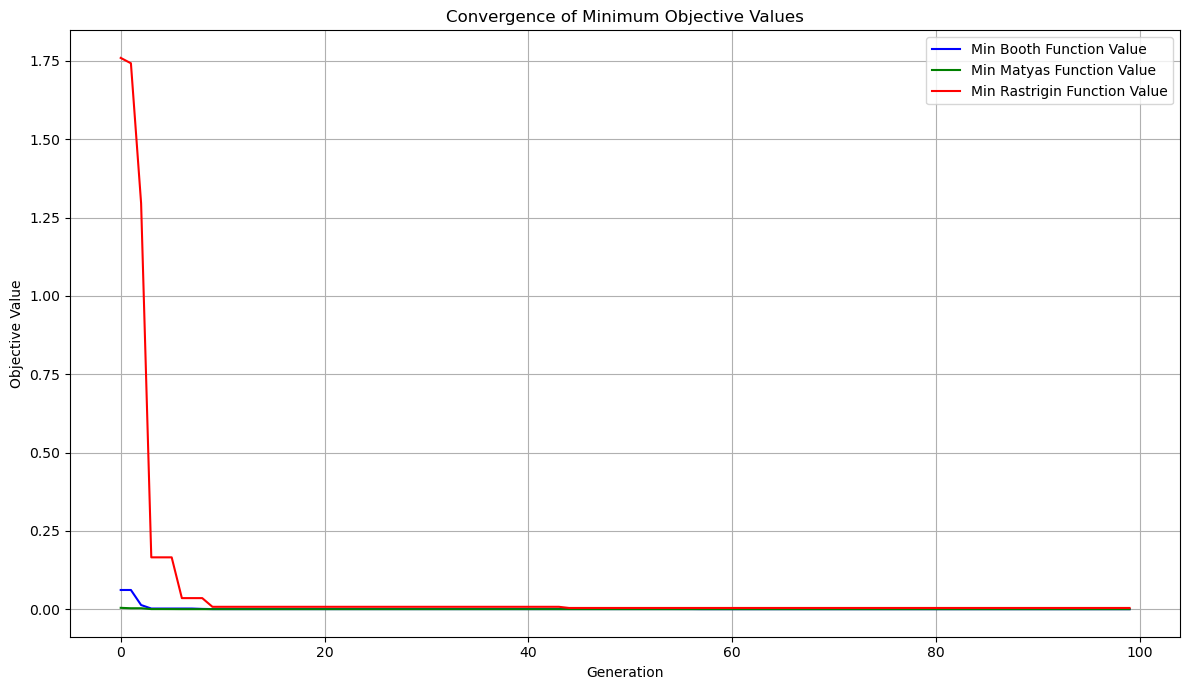

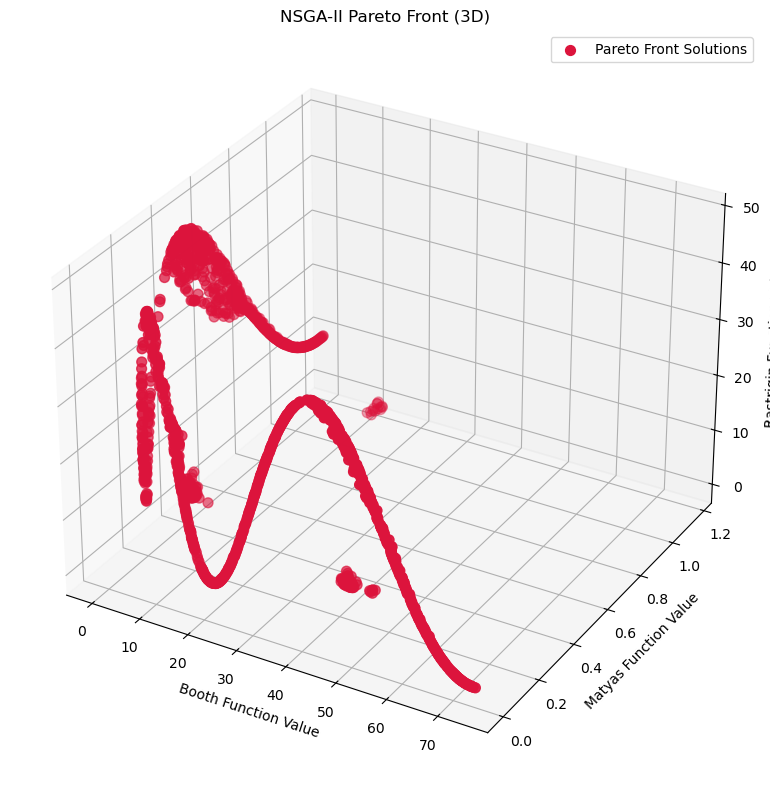

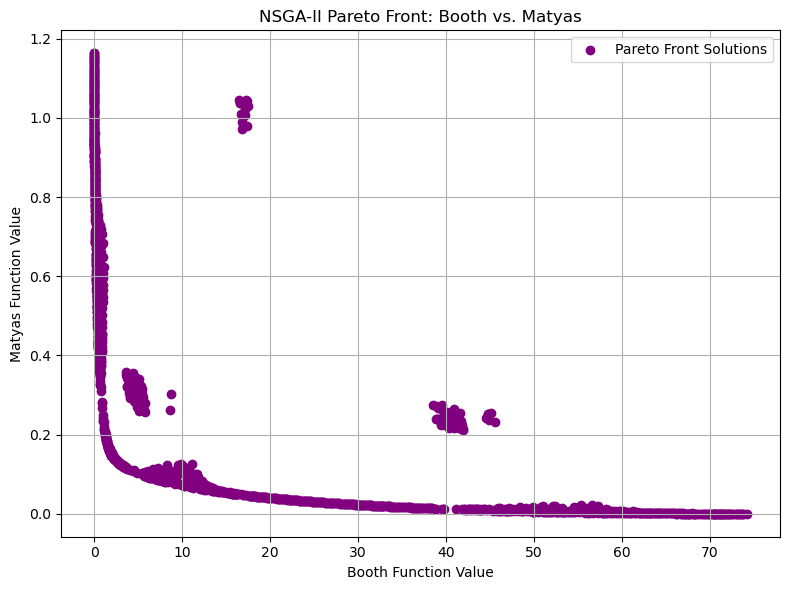

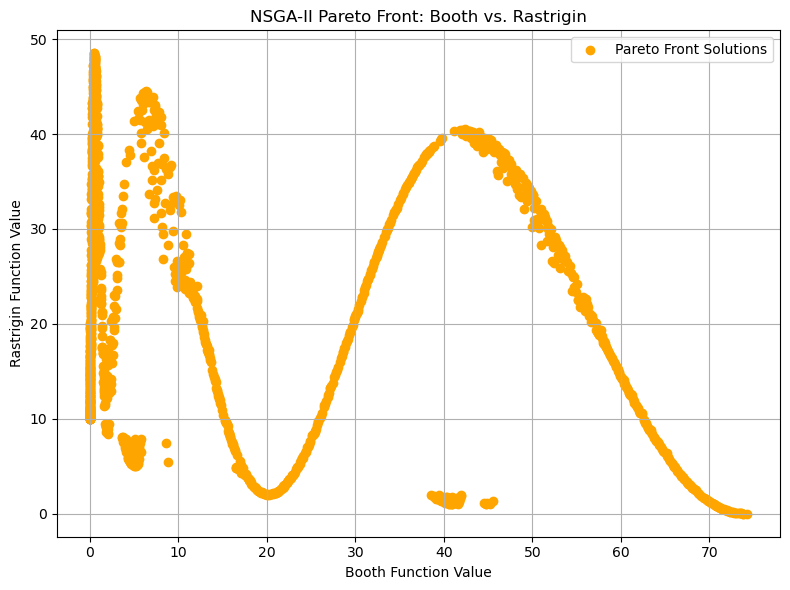

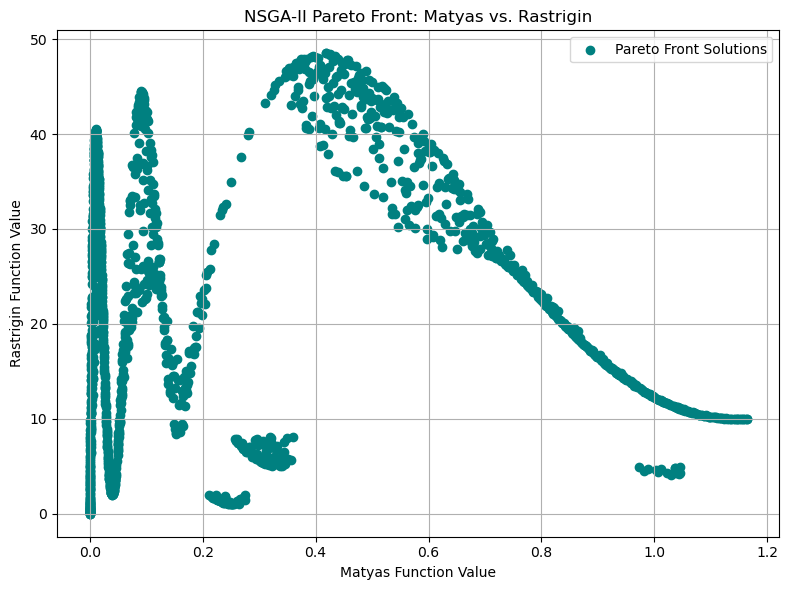


--- Example Pareto Solutions ---
Solution 1: Chromosome=[0.0017807541313272224, 0.004005523805481581], Objectives=(73.78739759428225, 1.5722101493792262e-06, 0.0038119910337837126)
Solution 2: Chromosome=[0.9988890347248086, 3.002150057689014], Objectives=(1.0175844086624803e-05, 1.1633468197221344, 10.011840381571414)
Solution 3: Chromosome=[0.9988890347248086, 3.002150057689014], Objectives=(1.0175844086624803e-05, 1.1633468197221344, 10.011840381571414)
Solution 4: Chromosome=[-0.0038718890215306834, -0.0031749921966431893], Objectives=(74.25251763644414, 6.180016451650848e-07, 0.004973894343850205)
Solution 5: Chromosome=[1.4939462889125772, 2.510658097209176], Objectives=(0.48352323564368455, 0.41879428817589126, 48.50563217405668)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math # Import math for general use, though not strictly needed for these simple functions
from mpl_toolkits.mplot3d import Axes3D # Required for 3D plotting

###############################################################################
# 1) OBJECTIVE FUNCTIONS
###############################################################################
def booth_function(x, y):
    """Booth's function: f1 = (x + 2y - 7)^2 + (2x + y - 5)^2"""
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

def matyas_function(x, y):
    """Matyas function: f2 = 0.26*(x^2 + y^2) - 0.48*x*y"""
    return 0.26*(x**2 + y**2) - 0.48*x*y

def rastrigin_function(x, y):
    """Rastrigin function: f3 = 20 + (x^2 - 10*cos(2*pi*x)) + (y^2 - 10*cos(2*pi*y))"""
    return 20 + (x**2 - 10 * np.cos(2 * np.pi * x)) + (y**2 - 10 * np.cos(2 * np.pi * y))

###############################################################################
# 2) NSGA-II PARAMETERS
###############################################################################
POP_SIZE = 1500 # Increased population size for more complex problem / 3 objectives
MAX_GEN = 100   # Increased generations for better convergence
XMIN, XMAX = -10, 10 # Domain for x
YMIN, YMAX = -10, 10 # Domain for y

ALPHA_BLX = 0.5
CROSS_RATE = 0.9
MUT_RATE = 0.2
ETA_MUT = 20.0

# Number of objectives for evaluation (Booth, Matyas, Rastrigin)
NUM_OBJECTIVES = 3 # Updated for three objectives

###############################################################################
# 3) CHROMOSOME GENERATION & EVALUATION
###############################################################################
def random_chromosome():
    """Generates a random chromosome [x, y] within the defined bounds."""
    return [random.uniform(XMIN, XMAX), random.uniform(YMIN, YMAX)]

def evaluate(chrom):
    """Evaluates a chromosome against all three objective functions."""
    x, y = chrom
    obj1 = booth_function(x, y)
    obj2 = matyas_function(x, y)
    obj3 = rastrigin_function(x, y)
    return obj1, obj2, obj3 # Return all three objectives

# Cache for evaluation results (optional, but good for performance if evaluations are expensive)
eval_cache = {}

def evaluate_cached(chrom):
    """
    Evaluates a chromosome and caches the result.
    Uses rounding for the key to handle floating-point precision.
    """
    key = tuple(round(v, 6) for v in chrom)
    if key not in eval_cache:
        eval_cache[key] = evaluate(chrom)
    return eval_cache[key]

###############################################################################
# 4) NSGA-II UTILITY FUNCTIONS (Identical to your provided code)
###############################################################################
def dominates(objA, objB):
    """
    Checks if objective vector A dominates objective vector B.
    A dominates B if A is better or equal in all objectives and strictly better in at least one.
    Assuming minimization objectives.
    """
    better_or_equal = True
    strictly_better = False
    for a, b in zip(objA, objB):
        if a > b: # A is worse than B in this objective
            better_or_equal = False
            break
    if not better_or_equal:
        return False
    for a, b in zip(objA, objB):
        if a < b: # A is strictly better than B in this objective
            strictly_better = True
            break
    return strictly_better

def fast_non_dominated_sort(pop_objs):
    """
    Performs fast non-dominated sorting on a population's objective values.
    Returns a list of fronts, where each front contains indices of individuals.
    """
    pop_size = len(pop_objs)
    S = [[] for _ in range(pop_size)] # S[p] contains solutions dominated by p
    n = [0] * pop_size                # n[p] is the number of solutions that dominate p
    rank = [0] * pop_size             # rank[p] is the non-domination rank of p

    # Determine domination status for each individual
    for p in range(pop_size):
        for q in range(pop_size):
            if p == q:
                continue
            if dominates(pop_objs[p], pop_objs[q]):
                S[p].append(q)
            elif dominates(pop_objs[q], pop_objs[p]):
                n[p] += 1

    # Identify the first front (F1)
    front = [[]]
    for i in range(pop_size):
        if n[i] == 0:
            rank[i] = 0 # Rank 0 for non-dominated solutions
            front[0].append(i)

    # Iteratively find subsequent fronts
    k = 0
    while front[k]:
        Q = [] # Next front
        for p_idx in front[k]:
            for q_idx in S[p_idx]:
                n[q_idx] -= 1 # Decrement domination count for solutions dominated by p_idx
                if n[q_idx] == 0:
                    rank[q_idx] = k + 1
                    Q.append(q_idx)
        k += 1
        front.append(Q)
    return front[:-1] # Exclude the last empty front

def crowding_distance(obj_vals, front_indices):
    """
    Calculates the crowding distance for individuals in a given front.
    Assigns infinity to boundary points.
    """
    distances = {idx: 0.0 for idx in front_indices}
    # For fronts with 2 or fewer individuals, crowding distance is not well-defined
    # and they are typically assigned infinity to ensure they are kept.
    if len(front_indices) <= 2:
        for idx in front_indices:
            distances[idx] = float('inf')
        return distances

    num_obj = len(obj_vals[0])

    for m in range(num_obj): # Iterate through each objective
        # Sort the front by the current objective's value
        sorted_indices = sorted(front_indices, key=lambda idx: obj_vals[idx][m])

        # Assign infinite distance to the boundary points of the sorted front
        distances[sorted_indices[0]] = float('inf')
        distances[sorted_indices[-1]] = float('inf')

        min_val = obj_vals[sorted_indices[0]][m]
        max_val = obj_vals[sorted_indices[-1]][m]

        # Handle cases where min and max values are identical (no range for that objective)
        if abs(max_val - min_val) < 1e-9:
            continue # Skip calculation for this objective if all values are the same

        # Calculate distance for intermediate points
        for i in range(1, len(sorted_indices) - 1):
            idx = sorted_indices[i]
            distances[idx] += (obj_vals[sorted_indices[i+1]][m] - obj_vals[sorted_indices[i-1]][m]) / (max_val - min_val)
    return distances

###############################################################################
# 5) REAL-CODED GA OPERATORS: BLX-α CROSSOVER & POLYNOMIAL MUTATION
###############################################################################
def clamp_value(val, index):
    """Clamps a value to be within the X or Y domain."""
    if index == 0: # X coordinate
        return min(max(val, XMIN), XMAX)
    elif index == 1: # Y coordinate
        return min(max(val, YMIN), YMAX)
    else:
        # This case should not be reached for [x, y] chromosomes
        raise ValueError("Invalid index for clamping in 2D chromosome")

def blend_crossover(pA, pB, alpha=ALPHA_BLX, rate=CROSS_RATE):
    """
    Performs BLX-alpha crossover between two parent chromosomes.
    Aims to create offspring within an extended range around parents' values.
    """
    if random.random() > rate: # Crossover occurs based on CROSS_RATE
        return pA[:], pB[:] # Return copies of parents if no crossover

    c1, c2 = pA[:], pB[:] # Initialize offspring as copies of parents

    # Iterate through each gene (x and y coordinates)
    for i in range(len(pA)):
        x1, x2 = pA[i], pB[i]
        cmin = min(x1, x2)
        cmax = max(x1, x2)
        diff = cmax - cmin

        # Calculate lower and upper bounds for the offspring's gene value
        low = cmin - alpha * diff
        high = cmax + alpha * diff

        # Generate two random values within the [low, high] range
        val1 = random.uniform(low, high)
        val2 = random.uniform(low, high)

        # Clamp values to ensure they stay within the defined domain (XMIN/XMAX or YMIN/YMAX)
        c1[i] = clamp_value(val1, i)
        c2[i] = clamp_value(val2, i)
    return c1, c2

def polynomial_mutation(chrom, rate=MUT_RATE, eta=ETA_MUT):
    """
    Performs polynomial mutation on a chromosome.
    Introduces small perturbations to gene values, favoring small changes.
    """
    for i in range(len(chrom)): # Iterate through each gene (x and y coordinates)
        if random.random() < rate: # Mutation occurs based on MUT_RATE
            x = chrom[i]
            lower = XMIN if i == 0 else YMIN
            upper = YMAX if i == 1 else XMAX # Corrected upper bound for Y coordinate

            # Avoid division by zero if the domain range is extremely small
            if abs(upper - lower) < 1e-14:
                continue

            # Calculate relative positions within the domain
            delta1 = (x - lower) / (upper - lower)
            delta2 = (upper - x) / (upper - lower)

            rand = random.random()
            mut_pow = 1.0 / (eta + 1.0)

            if rand < 0.5:
                xy = 1.0 - delta1
                val = 2.0 * rand + (1.0 - 2.0 * rand) * (xy ** (eta + 1.0))
                deltaq = (val ** mut_pow) - 1.0
            else:
                xy = 1.0 - delta2
                val = 2.0 * (1.0 - rand) + 2.0 * (rand - 0.5) * (xy ** (eta + 1.0))
                deltaq = 1.0 - (val ** mut_pow)

            # Apply the mutation
            x = x + deltaq * (upper - lower)
            chrom[i] = clamp_value(x, i) # Ensure mutated value stays within bounds
    return chrom

def make_offspring(parentA, parentB):
    """Combines crossover and mutation to create two offspring from two parents."""
    c1, c2 = blend_crossover(parentA, parentB, alpha=ALPHA_BLX, rate=CROSS_RATE)
    c1 = polynomial_mutation(c1, rate=MUT_RATE, eta=ETA_MUT)
    c2 = polynomial_mutation(c2, rate=MUT_RATE, eta=ETA_MUT)
    return c1, c2

###############################################################################
# 6) MAIN NSGA-II ALGORITHM
###############################################################################
def nsga2():
    """Main NSGA-II loop."""
    # Initialize population with random chromosomes
    population = [random_chromosome() for _ in range(POP_SIZE)]

    # Lists to store the minimum objective values for plotting convergence
    min_obj1_history = [] # For Booth
    min_obj2_history = [] # For Matyas
    min_obj3_history = [] # For Rastrigin


    for gen in range(MAX_GEN):
        # Evaluate current population
        obj_vals_pop = [evaluate_cached(chrom) for chrom in population]

        # Generate offspring
        offspring = []
        indices = list(range(POP_SIZE))
        random.shuffle(indices) # Shuffle indices for random pairing
        for i in range(0, POP_SIZE, 2): # Pair parents for crossover
            pA = population[indices[i]]
            # Handle odd population size for the last parent
            pB = population[indices[i+1]] if i + 1 < POP_SIZE else population[indices[0]]
            c1, c2 = make_offspring(pA, pB)
            offspring.append(c1)
            offspring.append(c2)

        # Combine parent and offspring populations
        combined = population + offspring
        combined_obj = [evaluate_cached(ch) for ch in combined]

        # Perform non-dominated sorting
        fronts = fast_non_dominated_sort(combined_obj)

        new_population = []
        current_pop_size = 0

        # Fill the new population based on fronts and crowding distance
        for front in fronts:
            if current_pop_size + len(front) <= POP_SIZE:
                # If the entire front fits, add it
                new_population.extend([combined[idx] for idx in front])
                current_pop_size += len(front)
            else:
                # If the front doesn't entirely fit, use crowding distance to select
                dist = crowding_distance(combined_obj, front)
                # Sort individuals in the front by crowding distance in descending order
                sorted_front = sorted(front, key=lambda idx: dist[idx], reverse=True)
                # Add individuals until the population size is reached
                remaining_slots = POP_SIZE - current_pop_size
                new_population.extend([combined[idx] for idx in sorted_front[:remaining_slots]])
                current_pop_size += remaining_slots
                break # Population is full

        population = new_population # Update population for next generation

        # --- Logging best values from the first (non-dominated) front ---
        if fronts and fronts[0]:
            # Get objective values for the first front individuals
            front_0_objs = [combined_obj[idx] for idx in fronts[0]]
            # Find the minimum for each objective in the first front
            min_f1 = min(obj[0] for obj in front_0_objs)
            min_f2 = min(obj[1] for obj in front_0_objs)
            min_f3 = min(obj[2] for obj in front_0_objs) # Get min Rastrigin

            min_obj1_history.append(min_f1)
            min_obj2_history.append(min_f2)
            min_obj3_history.append(min_f3) # Append min Rastrigin to history

            print(f"GEN {gen+1}/{MAX_GEN}: Min Booth={min_f1:.4f}, Min Matyas={min_f2:.4f}, Min Rastrigin={min_f3:.4f}")
        else:
            print(f"GEN {gen+1}/{MAX_GEN}: No non-dominated solutions found in this generation (unlikely).")

    # After MAX_GEN generations, return the final Pareto front
    final_obj_vals = [evaluate_cached(chrom) for chrom in population]
    final_fronts = fast_non_dominated_sort(final_obj_vals)
    pareto_front_indices = final_fronts[0] # The first front is the Pareto front
    pareto_solutions = [population[i] for i in pareto_front_indices]
    pareto_objs = [final_obj_vals[i] for i in pareto_front_indices]

    return pareto_solutions, pareto_objs, min_obj1_history, min_obj2_history, min_obj3_history

###############################################################################
# 7) MAIN EXECUTION & PLOTTING
###############################################################################
if __name__ == "__main__":
    pareto_sols, pareto_objs, min_obj1_hist, min_obj2_hist, min_obj3_hist = nsga2()

    if not pareto_sols:
        print("No Pareto solutions found.")
    else:
        # Extract all three objectives for plotting
        obj1_vals = [obj[0] for obj in pareto_objs] # Booth
        obj2_vals = [obj[1] for obj in pareto_objs] # Matyas
        obj3_vals = [obj[2] for obj in pareto_objs] # Rastrigin

        # --- Plotting Convergence of Minimum Objective Values ---
        plt.figure(figsize=(12, 7)) # Adjusted figure size for more room
        plt.plot(min_obj1_hist, label='Min Booth Function Value', color='blue')
        plt.plot(min_obj2_hist, label='Min Matyas Function Value', color='green')
        plt.plot(min_obj3_hist, label='Min Rastrigin Function Value', color='red') # Added Rastrigin history
        plt.xlabel("Generation")
        plt.ylabel("Objective Value")
        plt.title("Convergence of Minimum Objective Values")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # --- 3D Scatter Plot of Pareto Front ---
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(obj1_vals, obj2_vals, obj3_vals, c='crimson', marker='o', s=50, label='Pareto Front Solutions')
        ax.set_xlabel("Booth Function Value")
        ax.set_ylabel("Matyas Function Value")
        ax.set_zlabel("Rastrigin Function Value")
        ax.set_title("NSGA-II Pareto Front (3D)")
        ax.legend()
        plt.tight_layout()
        plt.show()

        # --- 2D Projections of Pareto Front ---

        # Booth vs. Matyas
        plt.figure(figsize=(8, 6))
        plt.scatter(obj1_vals, obj2_vals, color='purple', label='Pareto Front Solutions')
        plt.xlabel("Booth Function Value")
        plt.ylabel("Matyas Function Value")
        plt.title("NSGA-II Pareto Front: Booth vs. Matyas")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Booth vs. Rastrigin
        plt.figure(figsize=(8, 6))
        plt.scatter(obj1_vals, obj3_vals, color='orange', label='Pareto Front Solutions')
        plt.xlabel("Booth Function Value")
        plt.ylabel("Rastrigin Function Value")
        plt.title("NSGA-II Pareto Front: Booth vs. Rastrigin")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Matyas vs. Rastrigin
        plt.figure(figsize=(8, 6))
        plt.scatter(obj2_vals, obj3_vals, color='teal', label='Pareto Front Solutions')
        plt.xlabel("Matyas Function Value")
        plt.ylabel("Rastrigin Function Value")
        plt.title("NSGA-II Pareto Front: Matyas vs. Rastrigin")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Optionally print a few example Pareto solutions
        print("\n--- Example Pareto Solutions ---")
        for i, (sol, obj) in enumerate(zip(pareto_sols[:5], pareto_objs[:5])):
            print(f"Solution {i+1}: Chromosome={sol}, Objectives={obj}")



2D Projections of Pareto Front:
Booth vs. Rastrigin - This plot is particularly insightful. You can see a clear trade-off: as Booth values decrease, Rastrigin values tend to increase, and vice-versa. The front appears somewhat scattered and multi-peaked, especially in the regions where Rastrigin values are higher. This "roughness" is a direct consequence of Rastrigin's highly multimodal nature, where many local optima exist. The NSGA-II successfully found solutions across these different optimal regions in the decision space.

Matyas vs. Rastrigin - This projection also highlights a strong trade-off. Since both Matyas and Rastrigin have global minima at (0,0), solutions that are good for both will cluster near the origin of this plot. However, as Rastrigin values increase (indicating solutions further from its global minimum), Matyas values remain very low, reiterating its easy minimizability. The scattered nature, particularly for higher Rastrigin values, again points to the algorithm finding different local optima of Rastrigin. 

Example Pareto Solutions:
The example solutions illustrate the trade-offs. For instance, Solution 1 has a low Rastrigin (0.0038) and extremely low Matyas (1.57e-06), but a relatively high Booth (73.78).
Solution 2 (and 3) has an extremely low Booth (1.01e-05) and reasonable Matyas (1.16), but a higher Rastrigin (10.01).
This confirms that no single solution minimizes all three functions simultaneously, and the algorithm provides a set of diverse compromises.

